### Tarea de semana 4 Python Erika Neira

####Librerias

In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

Accedemos a los datos usando la función pd.read_csv() y el URL de la datos de miercoles proporcionado de los partidos fifa copa mundial procesados en esta pagina.

In [869]:
# Leer el archivo CSV
mundial= pd.read_csv('https://raw.githubusercontent.com/cienciadedatos/datos-de-miercoles/master/datos/2019/2019-04-10/partidos.txt', sep ="\t")
mundial.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,(1),1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,(2),1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,(3),1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,(4),1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,(5),1930-07-15,Argentina,Francia,1,0


In [870]:
anio_max_mundial = mundial['anio'].min()
anio_min_mundial = mundial['anio'].max()
print(anio_min_mundial, anio_max_mundial)

2018 1930


Los data proporcionada incluye datos del añio 1930 al 2018 
Ahora veamos cuantos partidos se celebraron en el 1930 filtrando el año

In [871]:
mundial.describe()

,anio,equipo_1_final,equipo_2_final
count,900.000000,900.000000,900.000000
mean,1986.915556,1.767778,1.152222
std,23.150270,1.597574,1.201661
min,1930.000000,0.000000,0.000000
25%,1970.000000,1.000000,0.000000
50%,1990.000000,1.000000,1.000000
75%,2006.000000,3.000000,2.000000
max,2018.000000,10.000000,7.000000


In [872]:
type('partido_orden')

str

In [873]:
type('fecha')

str

In [874]:
mundial['partido_orden'] = mundial['partido_orden'].str.replace('('  , '')
mundial['partido_orden'] = mundial['partido_orden'].str.replace(')'  , '')
mundial.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,1,1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,2,1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,3,1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,4,1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,5,1930-07-15,Argentina,Francia,1,0


In [875]:
mundial['partido_orden'] = mundial.partido_orden.astype(int)
mundial['fecha'] = mundial.fecha.astype('datetime64[ns]')

In [876]:
mundial.dtypes

anio                       int64
anfitrion                 object
estadio                   object
ciudad                    object
partido_orden              int32
fecha             datetime64[ns]
equipo_1                  object
equipo_2                  object
equipo_1_final             int64
equipo_2_final             int64
dtype: object

In [877]:
mundial.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final
0,1930,Uruguay,Estadio Pocitos,Montevideo,1,1930-07-13,Francia,Mexico,4,1
1,1930,Uruguay,Estadio Parque Central,Montevideo,2,1930-07-13,Estados Unidos,Bélgica,3,0
2,1930,Uruguay,Estadio Parque Central,Montevideo,3,1930-07-14,Yugoslavia,Brasil,2,1
3,1930,Uruguay,Estadio Pocitos,Montevideo,4,1930-07-14,Rumania,Perú,3,1
4,1930,Uruguay,Estadio Parque Central,Montevideo,5,1930-07-15,Argentina,Francia,1,0


In [878]:
partido_max=mundial['partido_orden'].max()
print(partido_max)

64


In [879]:
mundial.describe()

,anio,partido_orden,fecha,equipo_1_final,equipo_2_final
count,900.000000,900.000000,900,900.000000,900.000000
mean,1986.915556,25.317778,1987-05-20 16:24:00,1.767778,1.152222
min,1930.000000,1.000000,1930-07-13 00:00:00,0.000000,0.000000
25%,1970.000000,11.000000,1970-06-14 00:00:00,1.000000,0.000000
50%,1990.000000,23.000000,1990-06-23 12:00:00,1.000000,1.000000
75%,2006.000000,37.000000,2006-06-19 00:00:00,3.000000,2.000000
max,2018.000000,64.000000,2018-07-15 00:00:00,10.000000,7.000000
std,23.150270,16.871467,NaN,1.597574,1.201661


In [880]:
agrupacion_anio = mundial.groupby('anio').fecha.max()
agrupacion_anios=pd.DataFrame({'fecha_final':agrupacion_año})
agrupacion_anios

,fecha_final
anio,
1930,1930-07-30
1934,1934-06-10
1938,1938-06-19
1950,1950-07-16
1954,1954-07-04
1958,1958-06-29
1962,1962-06-17
1966,1966-07-30
1970,1970-06-21


Se quiere calcular los goles totales por pais y añadir a la tabla data

In [881]:

goles_equipo_1 = mundial.groupby(['anio', 'equipo_1'])['equipo_1_final'].sum().reset_index()
goles_equipo_2 = mundial.groupby(['anio', 'equipo_2'])['equipo_2_final'].sum().reset_index()

goles_equipo_1.columns = ['anio', 'pais', 'goles']
goles_equipo_2.columns = ['anio', 'pais', 'goles']

goles_totales = pd.concat([goles_equipo_1, goles_equipo_2])

goles_por_pais_y_anio = goles_totales.groupby(['anio', 'pais'])['goles'].sum().reset_index()

data= mundial.merge(goles_por_pais_y_anio, left_on=['anio', 'equipo_1'], right_on=['anio', 'pais'], how='left')

data.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,pais,goles
0,1930,Uruguay,Estadio Pocitos,Montevideo,1,1930-07-13,Francia,Mexico,4,1,Francia,4
1,1930,Uruguay,Estadio Parque Central,Montevideo,2,1930-07-13,Estados Unidos,Bélgica,3,0,Estados Unidos,7
2,1930,Uruguay,Estadio Parque Central,Montevideo,3,1930-07-14,Yugoslavia,Brasil,2,1,Yugoslavia,7
3,1930,Uruguay,Estadio Pocitos,Montevideo,4,1930-07-14,Rumania,Perú,3,1,Rumania,3
4,1930,Uruguay,Estadio Parque Central,Montevideo,5,1930-07-15,Argentina,Francia,1,0,Argentina,18


In [882]:
tabla_total = pd.DataFrame(data)
tabla_total.head()

,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,pais,goles
0,1930,Uruguay,Estadio Pocitos,Montevideo,1,1930-07-13,Francia,Mexico,4,1,Francia,4
1,1930,Uruguay,Estadio Parque Central,Montevideo,2,1930-07-13,Estados Unidos,Bélgica,3,0,Estados Unidos,7
2,1930,Uruguay,Estadio Parque Central,Montevideo,3,1930-07-14,Yugoslavia,Brasil,2,1,Yugoslavia,7
3,1930,Uruguay,Estadio Pocitos,Montevideo,4,1930-07-14,Rumania,Perú,3,1,Rumania,3
4,1930,Uruguay,Estadio Parque Central,Montevideo,5,1930-07-15,Argentina,Francia,1,0,Argentina,18


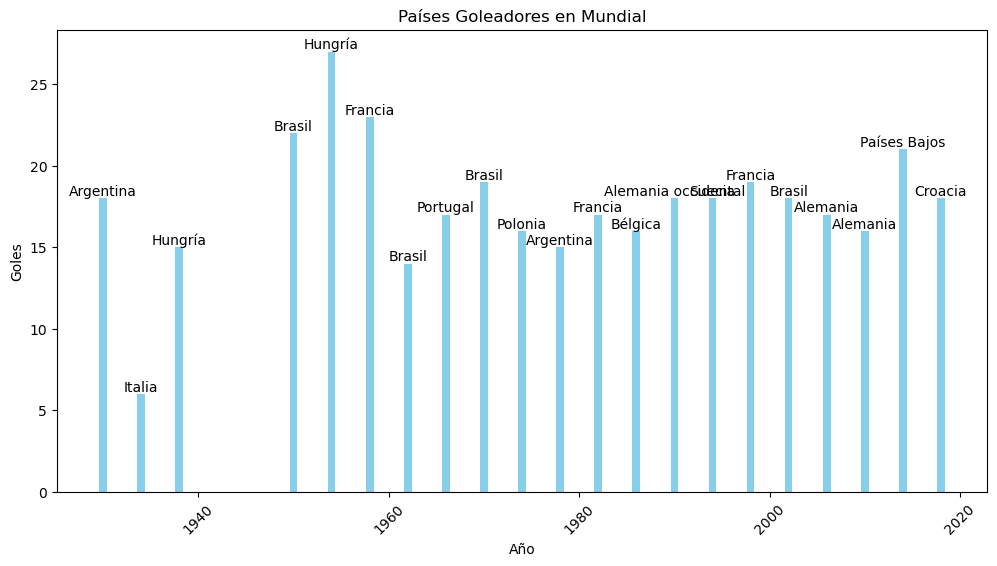

In [883]:
# Agrupa los datos por año y encuentra el país más goleador de cada año
paises_mas_goleadores = tabla_total.groupby('anio').apply(lambda x: x.nlargest(1, 'goles')).reset_index(drop=True)

# Gráfica los países más goleadores de cada año
plt.figure(figsize=(12, 6))
plt.bar(paises_mas_goleadores['anio'], paises_mas_goleadores['goles'], color='skyblue')
plt.xlabel('Año')
plt.ylabel('Goles')
plt.title('Países Goleadores en Mundial')

# Agrega el nombre del país más goleador encima de cada barra
for i, row in paises_mas_goleadores.iterrows():
    plt.annotate(row['pais'], (row['anio'], row['goles']), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.savefig('grafica1.png')
plt.show()

In [884]:
agrupacion_anios.shape[0]

21

In [885]:
tabla_total.shape[0]

900

In [886]:
resultado = pd.merge(agrupacion_anios, tabla_total, left_on='fecha_final', right_on='fecha', how='inner')
resultado = pd.DataFrame(resultado)
resultado.head()

,fecha_final,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,pais,goles
0,1930-07-30,1930,Uruguay,Estadio Centenario,Montevideo,18,1930-07-30,Uruguay,Argentina,4,2,Uruguay,15
1,1934-06-10,1934,Italia,Stadio Nazionale PNF,Rome,17,1934-06-10,Italia,Checoslovaquia,0,0,Italia,6
2,1938-06-19,1938,Francia,Parc Lescure,Bordeaux,17,1938-06-19,Suecia,Brasil,2,4,Suecia,11
3,1938-06-19,1938,Francia,Stade Olympique de Colombes,Paris,18,1938-06-19,Hungría,Italia,2,4,Hungría,15
4,1950-07-16,1950,Brasil,Estádio do Pacaembu,São Paulo,21,1950-07-16,Suecia,España,3,1,Suecia,11


In [887]:
resultado

,fecha_final,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,pais,goles
0,1930-07-30,1930,Uruguay,Estadio Centenario,Montevideo,18,1930-07-30,Uruguay,Argentina,4,2,Uruguay,15
1,1934-06-10,1934,Italia,Stadio Nazionale PNF,Rome,17,1934-06-10,Italia,Checoslovaquia,0,0,Italia,6
2,1938-06-19,1938,Francia,Parc Lescure,Bordeaux,17,1938-06-19,Suecia,Brasil,2,4,Suecia,11
3,1938-06-19,1938,Francia,Stade Olympique de Colombes,Paris,18,1938-06-19,Hungría,Italia,2,4,Hungría,15
4,1950-07-16,1950,Brasil,Estádio do Pacaembu,São Paulo,21,1950-07-16,Suecia,España,3,1,Suecia,11
5,1950-07-16,1950,Brasil,Estádio do Maracanã,Rio de Janeiro,22,1950-07-16,Uruguay,Brasil,2,1,Uruguay,15
6,1954-07-04,1954,Suiza,Wankdorf Stadium,Bern,24,1954-07-04,Hungría,Alemania occidental,2,3,Hungría,27
7,1958-06-29,1958,Suecia,Råsunda Stadium,Solna,32,1958-06-29,Suecia,Brasil,2,5,Suecia,12
8,1962-06-17,1962,Chile,Estadio Nacional,Santiago,32,1962-06-17,Brasil,Checoslovaquia,3,1,Brasil,14
9,1966-07-30,1966,Inglaterra,Wembley Stadium,London,32,1966-07-30,Inglaterra,Alemania occidental,4,2,Inglaterra,11


In [897]:
resultados_argentina = resultado[(resultado.equipo_1 == 'Argentina') ]
resultados_argentina
resultados_brasil = resultado[(resultado.equipo_1 == 'Brasil') ]
resultados_brasil

,fecha_final,anio,anfitrion,estadio,ciudad,partido_orden,fecha,equipo_1,equipo_2,equipo_1_final,equipo_2_final,pais,goles
8,1962-06-17,1962,Chile,Estadio Nacional,Santiago,32,1962-06-17,Brasil,Checoslovaquia,3,1,Brasil,14
10,1970-06-21,1970,Mexico,Estadio Azteca,Mexico City,32,1970-06-21,Brasil,Italia,4,1,Brasil,19
16,1994-07-17,1994,Estados Unidos,Rose Bowl,Pasadena,52,1994-07-17,Brasil,Italia,3,2,Brasil,14
17,1998-07-12,1998,Francia,Stade de France,Saint-Denis,64,1998-07-12,Brasil,Francia,0,3,Brasil,17


In [898]:
paises = resultados_argentina.equipo_1
paises

14    Argentina
Name: equipo_1, dtype: object

In [899]:
paises2 = resultados_brasil.equipo_1
paises2

8     Brasil
10    Brasil
16    Brasil
17    Brasil
Name: equipo_1, dtype: object

In [900]:
resultados_argentina = resultados_argentina.T
resultados_argentina

,14
fecha_final,1986-06-29 00:00:00
anio,1986
anfitrion,Mexico
estadio,Estadio Azteca
ciudad,Mexico City
partido_orden,52
fecha,1986-06-29 00:00:00
equipo_1,Argentina
equipo_2,Alemania occidental
equipo_1_final,3


In [901]:
resultados_argentina.columns = paises.values
resultados_argentina

,Argentina
fecha_final,1986-06-29 00:00:00
anio,1986
anfitrion,Mexico
estadio,Estadio Azteca
ciudad,Mexico City
partido_orden,52
fecha,1986-06-29 00:00:00
equipo_1,Argentina
equipo_2,Alemania occidental
equipo_1_final,3


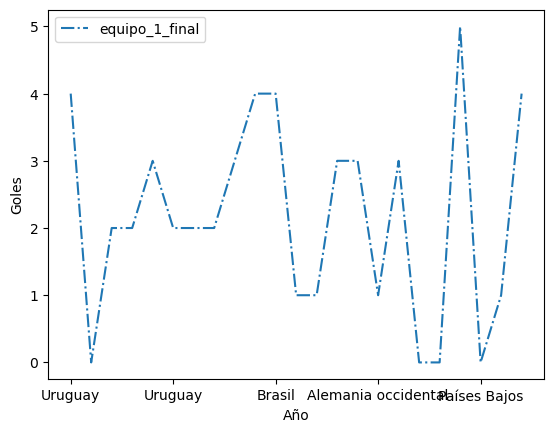

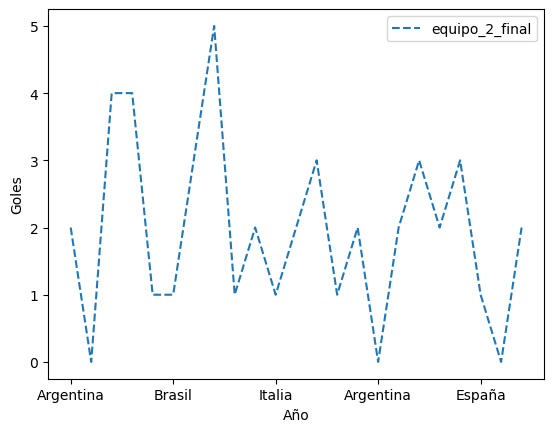

In [902]:
#graficas
resultado.plot(x='equipo_1', y='equipo_1_final', linestyle='-.')
plt.xlabel('Año')
plt.ylabel('Goles')
plt.savefig('grafica3.png')
resultado.plot(x='equipo_2', y='equipo_2_final', linestyle = '--')
plt.xlabel('Año')
plt.ylabel('Goles')
plt.savefig('grafica2.png')
plt.show()

In [903]:
plt.savefig('grafica2.png')

<Figure size 640x480 with 0 Axes>

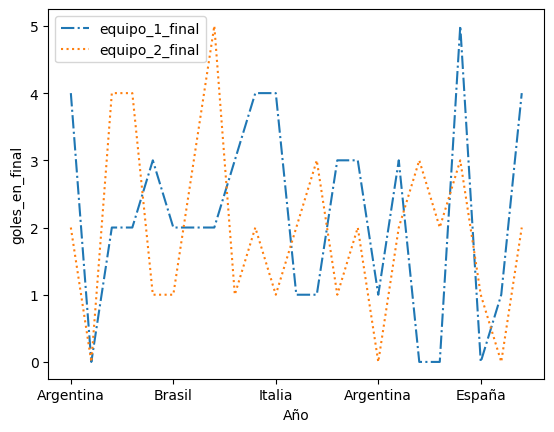

In [917]:
fig = plt.figure()
#Agregamos un eje 
eje = fig.add_subplot(1, 1, 1)
#Ahora graficamos los datos 
resultado.plot(x = 'equipo_1', y = 'equipo_1_final', ax = eje, linestyle = '-.')
resultado.plot(x = 'equipo_2', y = 'equipo_2_final', ax = eje, linestyle = ':')
#Ahora etiquetamos los ejes
plt.xlabel('Año')
plt.ylabel('goles_en_final')
plt.savefig('grafica4.png')